In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [2]:
dataset=pd.read_csv(r"C:\Users\Mohammad Noor Malik\OneDrive\Dokumen\python\internship tasks\week 5\scaled dataset.csv",index_col=0)
dataset

,customer_id,age,gender,marital_status,annual_income,total_purchases,preferred_category
0,4233,60,Female,Single,0.219041,0.875,Home Goods
1,5451,23,Male,Single,0.078355,0.075,Home Goods
2,5813,40,Female,Married,0.695944,0.625,Electronics
3,3141,57,Female,Married,0.400385,0.425,Home Goods
4,3121,23,Female,Single,0.117199,0.375,Appliances
...,...,...,...,...,...,...,...
495,4813,60,Female,Divorced,0.961713,0.150,Home Goods
496,3620,36,Male,Married,0.337131,0.350,Electronics
497,2738,55,Female,Divorced,0.245456,0.675,Electronics
498,2616,29,Male,Married,0.702481,0.025,Home Goods


Applying Kmeans clustering to the numeric attributes


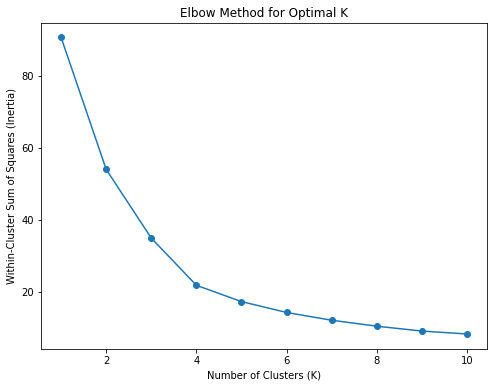

In [7]:
numeric_columns = ['annual_income', 'total_purchases']
X = dataset[numeric_columns]
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.show()


In [8]:
# from the elbow method I deduced that the optimal number of clusters were equal to 4 
k = 4

kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X)

# Adding cluster labels to the dataset
dataset['Cluster'] = clusters

# Displaying the cluster assignments
dataset

,customer_id,age,gender,marital_status,annual_income,total_purchases,preferred_category,Cluster
0,4233,60,Female,Single,0.219041,0.875,Home Goods,1
1,5451,23,Male,Single,0.078355,0.075,Home Goods,2
2,5813,40,Female,Married,0.695944,0.625,Electronics,3
3,3141,57,Female,Married,0.400385,0.425,Home Goods,2
4,3121,23,Female,Single,0.117199,0.375,Appliances,2
...,...,...,...,...,...,...,...,...
495,4813,60,Female,Divorced,0.961713,0.150,Home Goods,0
496,3620,36,Male,Married,0.337131,0.350,Electronics,2
497,2738,55,Female,Divorced,0.245456,0.675,Electronics,1
498,2616,29,Male,Married,0.702481,0.025,Home Goods,0
